# Regression Models
- Trying to make some model describe my data
- Datasets:
    - urea_saline_uvvis.csv
    - pour_saline_uvvis.csv
    - urea_saline_cary5000.csv
- Regression Models:
    - Bayesian
    - Ordinary Least Squares
    - Partial Least Squares
    - Decision Tree
    - Support Vector
        - Linear
        - Polynomial
        - Radial Basis Function

Original code: https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

### Import Packages

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import BayesianRidge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

plt.style.use('ggplot')

# Set seed
seed = 4

### Import Datasets

In [49]:
# Import data
saline_uv_data = pd.read_csv('Datasets/urea_saline_uvvis.csv')
pour_uv_data = pd.read_csv('Datasets/pour_saline_uvvis.csv')
cary_data = pd.read_csv('Datasets/urea_saline_cary5000.csv')

# Choose only 190-300 nm wavelength range for X (features)
X_sal = saline_uv_data.drop(saline_uv_data.columns[112:312], axis=1)
X_sal = X_sal.drop(X_sal.columns[0:1], axis=1)
X_pour = pour_uv_data.drop(pour_uv_data.columns[115:615], axis=1)
X_pour = X_pour.drop(X_pour.columns[0:4], axis=1)
X_pour = X_pour.iloc[:,5:31]
X_cary_uv = cary_data.drop(cary_data.columns[0:2204], axis=1)
X_cary_uv = X_cary_uv.drop([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

# Choose only 800-2500 nm wavelength range for X_nir
X_cary_nir = cary_data.drop(cary_data.columns[0:4], axis=1)
X_cary_nir = X_cary_nir.drop(X_cary_nir.columns[1701:2311], axis=1)
X_cary_nir = X_cary_nir.drop([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

# Define targets (y)
y_sal = saline_uv_data['urea_concentration (mM)'].values.reshape(-1, 1)
y_pour = pour_uv_data['Urea Concentration (mM)'].values.reshape(-1, 1)
y_cary = cary_data['Urea Concentration (mM)'].values.reshape(-1, 1)
y_cary = np.delete(y_cary, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)

### Normalize the data

In [51]:
# Normalize data
sc = StandardScaler()
X_sal = sc.fit_transform(X_sal)
X_pour = sc.fit_transform(X_pour)
X_cary_uv = sc.fit_transform(X_cary_uv)
X_cary_nir = sc.fit_transform(X_cary_nir)

## Regression using multiple models

### with urea_saline_uvvis.csv dataset

In [4]:
# First make train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_sal, y_sal, test_size=0.2, random_state=seed, shuffle=True)

# Flatten y
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Text(0.5, 1.0, 'Scores of test set')

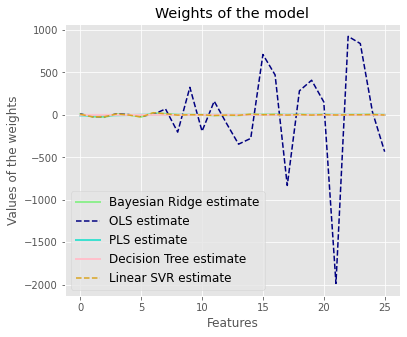

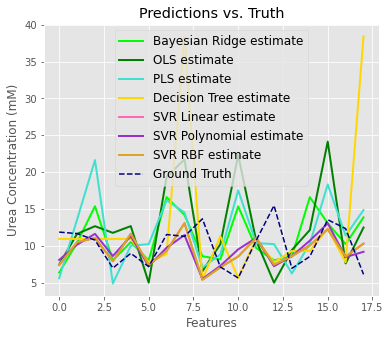

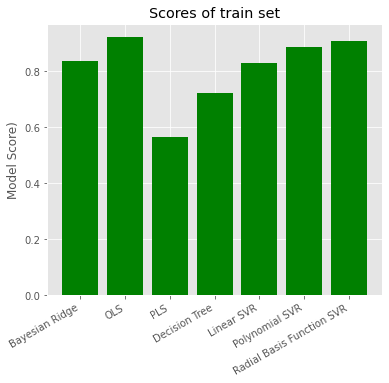

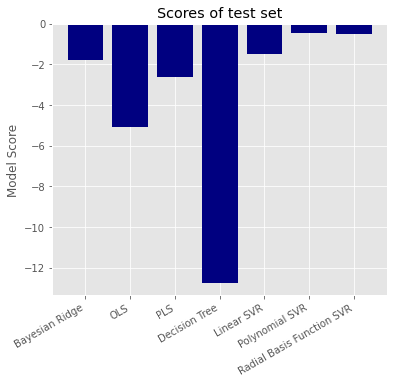

In [48]:
# Initiate models and fit to train datasets
clf = BayesianRidge(compute_score=True).fit(X_train, y_train)
ols = LinearRegression().fit(X_train, y_train)
pls = PLSRegression().fit(X_train, y_train)
dtr = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)
svr_lin = SVR(kernel="linear", C=100, gamma="auto").fit(X_train, y_train)
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)


#logr = LogisticRegression().fit(X_train, y_train)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="lightgreen", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.plot(pls.coef_, color="turquoise", linewidth=lw, label="PLS estimate")
plt.plot(dtr.feature_importances_, color="pink", linewidth=lw, label="Decision Tree estimate")
svr_lin_coef = svr_lin.coef_
svr_lin_coef = np.ravel(svr_lin_coef)
plt.plot(svr_lin_coef, color="goldenrod", linestyle='--', label="Linear SVR estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Make predictions on test set using models
y_clf_predict = clf.predict(X_test)
y_ols_predict = ols.predict(X_test)
y_pls_predict = pls.predict(X_test)
y_dtr_predict = dtr.predict(X_test)
y_svrlin_predict = svr_rbf.predict(X_test)
y_svrpoly_predict = svr_poly.predict(X_test)
y_svrrbf_predict = svr_rbf.predict(X_test)


# Plot predictions vs. truth
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Predictions vs. Truth")
plt.plot(y_clf_predict, color="lime", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(y_ols_predict, color="green", linewidth=lw, label="OLS estimate")
plt.plot(y_pls_predict, color="turquoise", linewidth=lw, label="PLS estimate")
plt.plot(y_dtr_predict, color="gold", linewidth=lw, label="Decision Tree estimate")

plt.plot(y_svrlin_predict, color="hotpink", linewidth=lw, label="SVR Linear estimate")
plt.plot(y_svrpoly_predict, color="darkorchid", linewidth=lw, label="SVR Polynomial estimate")
plt.plot(y_svrrbf_predict, color="goldenrod", linewidth=lw, label="SVR RBF estimate")

plt.plot(y_test, color="navy", linestyle="--", label="Ground Truth")
plt.xlabel("Features")
plt.ylabel("Urea Concentration (mM)")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Calculate and plot scores for each model

models = [clf, ols, pls, dtr, svr_lin, svr_poly, svr_rbf]
model_names = ['Bayesian Ridge', 'OLS', 'PLS', 'Decision Tree', 'Linear SVR', 'Polynomial SVR', 'Radial Basis Function SVR']
train_scores = []
test_scores = []
for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
# Plot model scores
plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=train_scores, color='green')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score)")
plt.title('Scores of train set')

plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=test_scores, color='navy')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score")
plt.title('Scores of test set')

### with pour_saline_uvvis.csv dataset

In [40]:
# First make train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_pour, y_pour, test_size=0.2, random_state=seed, shuffle=True)

# Flatten y
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Text(0.5, 1.0, 'Scores of test set')

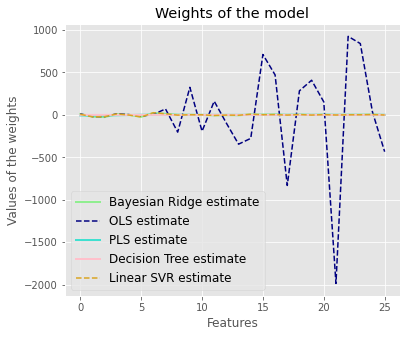

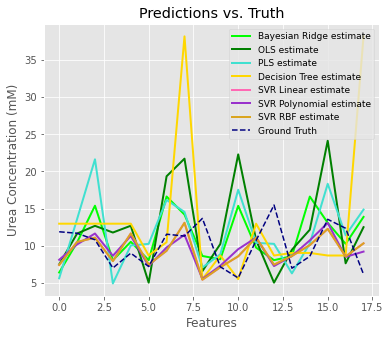

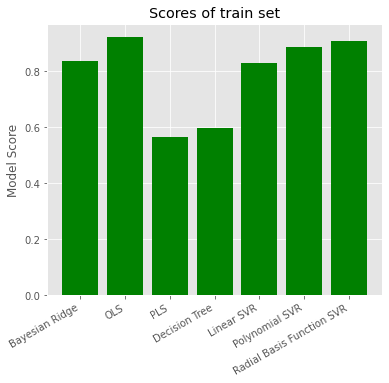

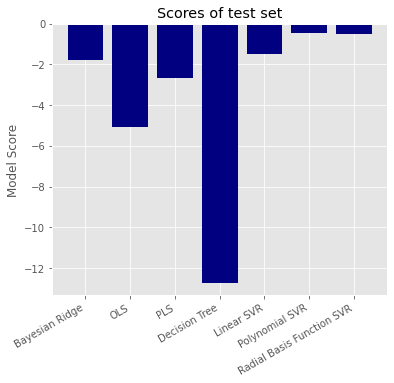

In [44]:
# Initiate models and fit to train datasets
clf = BayesianRidge(compute_score=True).fit(X_train, y_train)
ols = LinearRegression().fit(X_train, y_train)
pls = PLSRegression().fit(X_train, y_train)
dtr = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)
svr_lin = SVR(kernel="linear", C=100, gamma="auto").fit(X_train, y_train)
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)


#logr = LogisticRegression().fit(X_train, y_train)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="lightgreen", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.plot(pls.coef_, color="turquoise", linewidth=lw, label="PLS estimate")
plt.plot(dtr.feature_importances_, color="pink", linewidth=lw, label="Decision Tree estimate")
svr_lin_coef = svr_lin.coef_
svr_lin_coef = np.ravel(svr_lin_coef)
plt.plot(svr_lin_coef, color="goldenrod", linestyle='--', label="Linear SVR estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Make predictions on test set using models
y_clf_predict = clf.predict(X_test)
y_ols_predict = ols.predict(X_test)
y_pls_predict = pls.predict(X_test)
y_dtr_predict = dtr.predict(X_test)
y_svrlin_predict = svr_rbf.predict(X_test)
y_svrpoly_predict = svr_poly.predict(X_test)
y_svrrbf_predict = svr_rbf.predict(X_test)


# Plot predictions vs. truth
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Predictions vs. Truth")
plt.plot(y_clf_predict, color="lime", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(y_ols_predict, color="green", linewidth=lw, label="OLS estimate")
plt.plot(y_pls_predict, color="turquoise", linewidth=lw, label="PLS estimate")
plt.plot(y_dtr_predict, color="gold", linewidth=lw, label="Decision Tree estimate")

plt.plot(y_svrlin_predict, color="hotpink", linewidth=lw, label="SVR Linear estimate")
plt.plot(y_svrpoly_predict, color="darkorchid", linewidth=lw, label="SVR Polynomial estimate")
plt.plot(y_svrrbf_predict, color="goldenrod", linewidth=lw, label="SVR RBF estimate")

plt.plot(y_test, color="navy", linestyle="--", label="Ground Truth")
plt.xlabel("Features")
plt.ylabel("Urea Concentration (mM)")
plt.legend(loc="best", prop=dict(size=9))

# #############################################################################
# Calculate and plot scores for each model

models = [clf, ols, pls, dtr, svr_lin, svr_poly, svr_rbf]
model_names = ['Bayesian Ridge', 'OLS', 'PLS', 'Decision Tree', 'Linear SVR', 'Polynomial SVR', 'Radial Basis Function SVR']
train_scores = []
test_scores = []
for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
# Plot model scores
plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=train_scores, color='green')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score")
plt.title('Scores of train set')

plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=test_scores, color='navy')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score")
plt.title('Scores of test set')

### with deep-UV region of urea_saline_cary.csv dataset
190-300 nm

In [7]:
# First make train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_cary_uv, y_cary, test_size=0.2, random_state=seed, shuffle=True)

# Flatten y
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Text(0.5, 1.0, 'Scores of test set')

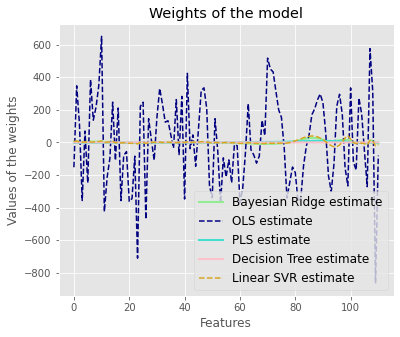

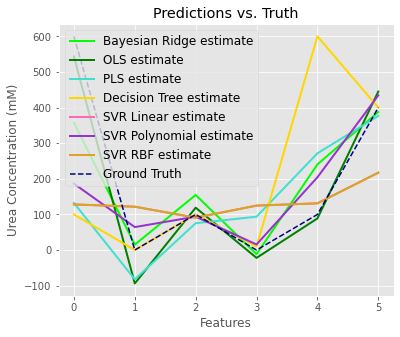

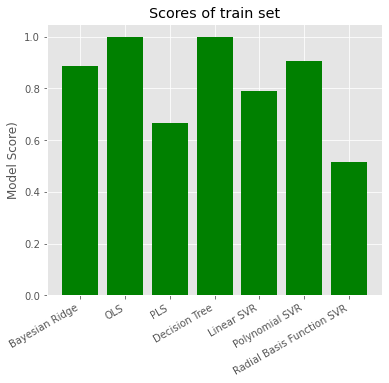

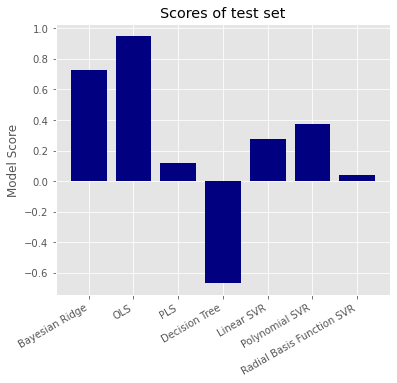

In [8]:
# Initiate models and fit to train datasets
clf = BayesianRidge(compute_score=True).fit(X_train, y_train)
ols = LinearRegression().fit(X_train, y_train)
pls = PLSRegression().fit(X_train, y_train)
dtr = DecisionTreeRegressor().fit(X_train, y_train)
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)
svr_lin = SVR(kernel="linear", C=100, gamma="auto").fit(X_train, y_train)
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)


#logr = LogisticRegression().fit(X_train, y_train)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="lightgreen", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.plot(pls.coef_, color="turquoise", linewidth=lw, label="PLS estimate")
plt.plot(dtr.feature_importances_, color="pink", linewidth=lw, label="Decision Tree estimate")
svr_lin_coef = svr_lin.coef_
svr_lin_coef = np.ravel(svr_lin_coef)
plt.plot(svr_lin_coef, color="goldenrod", linestyle='--', label="Linear SVR estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Make predictions on test set using models
y_clf_predict = clf.predict(X_test)
y_ols_predict = ols.predict(X_test)
y_pls_predict = pls.predict(X_test)
y_dtr_predict = dtr.predict(X_test)
y_svrlin_predict = svr_rbf.predict(X_test)
y_svrpoly_predict = svr_poly.predict(X_test)
y_svrrbf_predict = svr_rbf.predict(X_test)


# Plot predictions vs. truth
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Predictions vs. Truth")
plt.plot(y_clf_predict, color="lime", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(y_ols_predict, color="green", linewidth=lw, label="OLS estimate")
plt.plot(y_pls_predict, color="turquoise", linewidth=lw, label="PLS estimate")
plt.plot(y_dtr_predict, color="gold", linewidth=lw, label="Decision Tree estimate")

plt.plot(y_svrlin_predict, color="hotpink", linewidth=lw, label="SVR Linear estimate")
plt.plot(y_svrpoly_predict, color="darkorchid", linewidth=lw, label="SVR Polynomial estimate")
plt.plot(y_svrrbf_predict, color="goldenrod", linewidth=lw, label="SVR RBF estimate")

plt.plot(y_test, color="navy", linestyle="--", label="Ground Truth")
plt.xlabel("Features")
plt.ylabel("Urea Concentration (mM)")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Calculate and plot scores for each model

models = [clf, ols, pls, dtr, svr_lin, svr_poly, svr_rbf]
model_names = ['Bayesian Ridge', 'OLS', 'PLS', 'Decision Tree', 'Linear SVR', 'Polynomial SVR', 'Radial Basis Function SVR']
train_scores = []
test_scores = []
for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
# Plot model scores
plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=train_scores, color='green')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score)")
plt.title('Scores of train set')

plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=test_scores, color='navy')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score")
plt.title('Scores of test set')

### with NIR region of urea_saline_cary.csv dataset
800-2500 nm

In [270]:
# First make train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_cary_nir, y_cary, test_size=0.2, random_state=seed, shuffle=True)

# Flatten y
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Text(0.5, 1.0, 'Scores of test set')

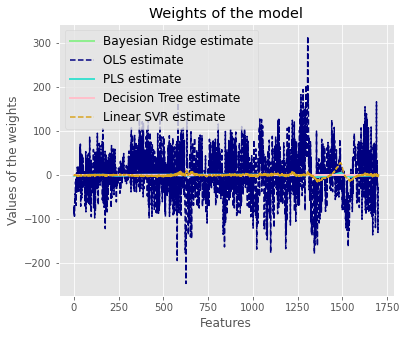

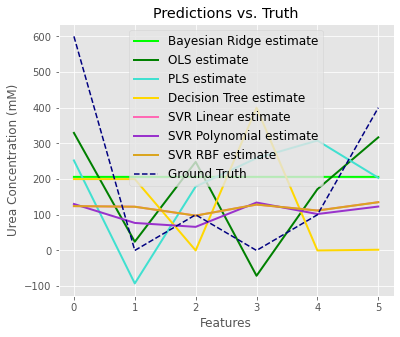

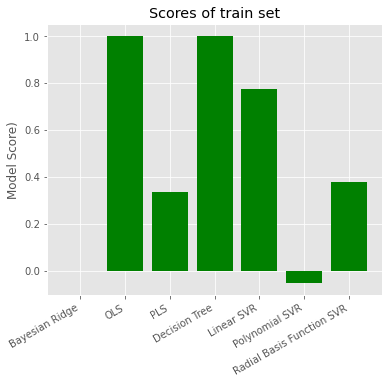

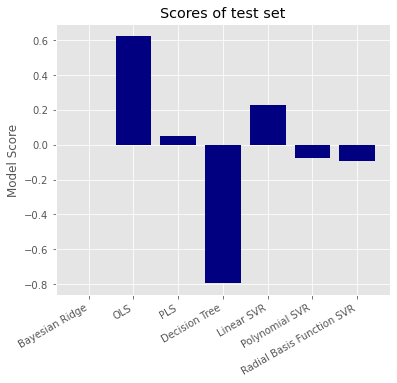

In [271]:
# Initiate models and fit to train datasets
clf = BayesianRidge(compute_score=True).fit(X_train, y_train)
ols = LinearRegression().fit(X_train, y_train)
pls = PLSRegression().fit(X_train, y_train)
dtr = DecisionTreeRegressor().fit(X_train, y_train)
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)
svr_lin = SVR(kernel="linear", C=100, gamma="auto").fit(X_train, y_train)
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)


#logr = LogisticRegression().fit(X_train, y_train)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="lightgreen", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.plot(pls.coef_, color="turquoise", linewidth=lw, label="PLS estimate")
plt.plot(dtr.feature_importances_, color="pink", linewidth=lw, label="Decision Tree estimate")
svr_lin_coef = svr_lin.coef_
svr_lin_coef = np.ravel(svr_lin_coef)
plt.plot(svr_lin_coef, color="goldenrod", linestyle='--', label="Linear SVR estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Make predictions on test set using models
y_clf_predict = clf.predict(X_test)
y_ols_predict = ols.predict(X_test)
y_pls_predict = pls.predict(X_test)
y_dtr_predict = dtr.predict(X_test)
y_svrlin_predict = svr_rbf.predict(X_test)
y_svrpoly_predict = svr_poly.predict(X_test)
y_svrrbf_predict = svr_rbf.predict(X_test)


# Plot predictions vs. truth
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Predictions vs. Truth")
plt.plot(y_clf_predict, color="lime", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(y_ols_predict, color="green", linewidth=lw, label="OLS estimate")
plt.plot(y_pls_predict, color="turquoise", linewidth=lw, label="PLS estimate")
plt.plot(y_dtr_predict, color="gold", linewidth=lw, label="Decision Tree estimate")

plt.plot(y_svrlin_predict, color="hotpink", linewidth=lw, label="SVR Linear estimate")
plt.plot(y_svrpoly_predict, color="darkorchid", linewidth=lw, label="SVR Polynomial estimate")
plt.plot(y_svrrbf_predict, color="goldenrod", linewidth=lw, label="SVR RBF estimate")

plt.plot(y_test, color="navy", linestyle="--", label="Ground Truth")
plt.xlabel("Features")
plt.ylabel("Urea Concentration (mM)")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Calculate and plot scores for each model

models = [clf, ols, pls, dtr, svr_lin, svr_poly, svr_rbf]
model_names = ['Bayesian Ridge', 'OLS', 'PLS', 'Decision Tree', 'Linear SVR', 'Polynomial SVR', 'Radial Basis Function SVR']
train_scores = []
test_scores = []
for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
# Plot model scores
plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=train_scores, color='green')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score)")
plt.title('Scores of train set')

plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=test_scores, color='navy')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score")
plt.title('Scores of test set')